<a href="https://colab.research.google.com/github/shubhamksingh1/TextClassification/blob/main/Spanish/BertTextClassification_Spanish_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install Simple Transformers library 

In [ ]:
# install simpletransformers
!pip install simpletransformers

In [ ]:
# check installed version
!pip freeze | grep simpletransformers
# simpletransformers==0.28.2

simpletransformers==0.47.2


### Dataset Preparation

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Spanish_Airline_Tweets/tweets_public.csv")

In [ ]:
df.shape

(7867, 10)

In [ ]:
df.describe()

,reply_count,retweet_count,tweet_id
count,7867.0,7867.0,7.867000e+03
mean,0.0,0.0,9.375845e+17
std,0.0,0.0,7.282961e+15
min,0.0,0.0,9.231272e+17
25%,0.0,0.0,9.329170e+17
50%,0.0,0.0,9.373422e+17
75%,0.0,0.0,9.430857e+17
max,0.0,0.0,9.504567e+17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7867 entries, 0 to 7866
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  7867 non-null   object
 1   is_reply           7867 non-null   bool  
 2   reply_count        7867 non-null   int64 
 3   retweet_count      7867 non-null   int64 
 4   text               7867 non-null   object
 5   tweet_coord        20 non-null     object
 6   tweet_created      7867 non-null   object
 7   tweet_id           7867 non-null   int64 
 8   tweet_location     419 non-null    object
 9   user_timezone      5100 non-null   object
dtypes: bool(1), int64(3), object(6)
memory usage: 561.0+ KB


In [ ]:
df.head()

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,neutral,False,0,0,Trabajar en #Ryanair como #TMA: https://t.co/r...,NaN,Fri Nov 03 12:05:12 +0000 2017,926419989107798016,NaN,Madrid
1,neutral,True,0,0,@Iberia @FIONAFERRER Cuando gusten en Cancún s...,NaN,Sun Nov 26 18:40:28 +0000 2017,934854385577943041,NaN,Mexico City
2,negative,False,0,0,Sabiais que @Iberia te trata muy bien en santi...,NaN,Mon Dec 25 15:40:45 +0000 2017,945318406441635840,NaN,Madrid
3,negative,False,0,0,NUNCA NUNCA NUNCA pidáis el café de Ryanair.\n...,NaN,Mon Nov 06 14:18:35 +0000 2017,927540721296568320,NaN,Pacific Time (US & Canada)
4,positive,True,0,0,@cris_tortu @dakar @Iberia @Mitsubishi_ES @BFG...,NaN,Mon Jan 01 23:00:57 +0000 2018,947965901332197376,NaN,Buenos Aires


In [ ]:
df.tail()

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
7862,negative,True,0,0,@Iberia @iberiaexpress especialistas en dejart...,NaN,Thu Dec 28 22:34:23 +0000 2017,946509662341554176,NaN,NaN
7863,neutral,False,0,0,"Con @Iberia, mi destino a un solo click. ¡Dese...",NaN,Wed Nov 29 18:59:49 +0000 2017,935946417495035904,NaN,Eastern Time (US & Canada)
7864,positive,True,0,0,@Iberia Muy bien. Muchas gracias,NaN,Tue Dec 26 21:38:36 +0000 2017,945770846949396480,NaN,Greenland
7865,negative,False,0,0,Es que volar con Ryanair es peor que irte a ch...,NaN,Tue Dec 19 09:08:35 +0000 2017,943045386570223616,NaN,Atlantic Time (Canada)
7866,negative,False,0,0,Iberia inaugura un nuevo espacio Premium para ...,NaN,Tue Nov 28 16:30:58 +0000 2017,935546571663527936,NaN,Madrid


In [ ]:
df.columns

Index(['airline_sentiment', 'is_reply', 'reply_count', 'retweet_count', 'text',
       'tweet_coord', 'tweet_created', 'tweet_id', 'tweet_location',
       'user_timezone'],
      dtype='object')

In [ ]:
df.drop(columns=['is_reply', 'reply_count', 'retweet_count',
       'tweet_coord', 'tweet_created', 'tweet_id', 'tweet_location',
       'user_timezone'],inplace=True)

In [ ]:
df.shape

(7867, 2)

In [ ]:
df.head()

,airline_sentiment,text
0,neutral,Trabajar en #Ryanair como #TMA: https://t.co/r...
1,neutral,@Iberia @FIONAFERRER Cuando gusten en Cancún s...
2,negative,Sabiais que @Iberia te trata muy bien en santi...
3,negative,NUNCA NUNCA NUNCA pidáis el café de Ryanair.\n...
4,positive,@cris_tortu @dakar @Iberia @Mitsubishi_ES @BFG...


In [ ]:
df.tail()

,airline_sentiment,text
7862,negative,@Iberia @iberiaexpress especialistas en dejart...
7863,neutral,"Con @Iberia, mi destino a un solo click. ¡Dese..."
7864,positive,@Iberia Muy bien. Muchas gracias
7865,negative,Es que volar con Ryanair es peor que irte a ch...
7866,negative,Iberia inaugura un nuevo espacio Premium para ...


In [ ]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from statistics import *
from tabulate import tabulate

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

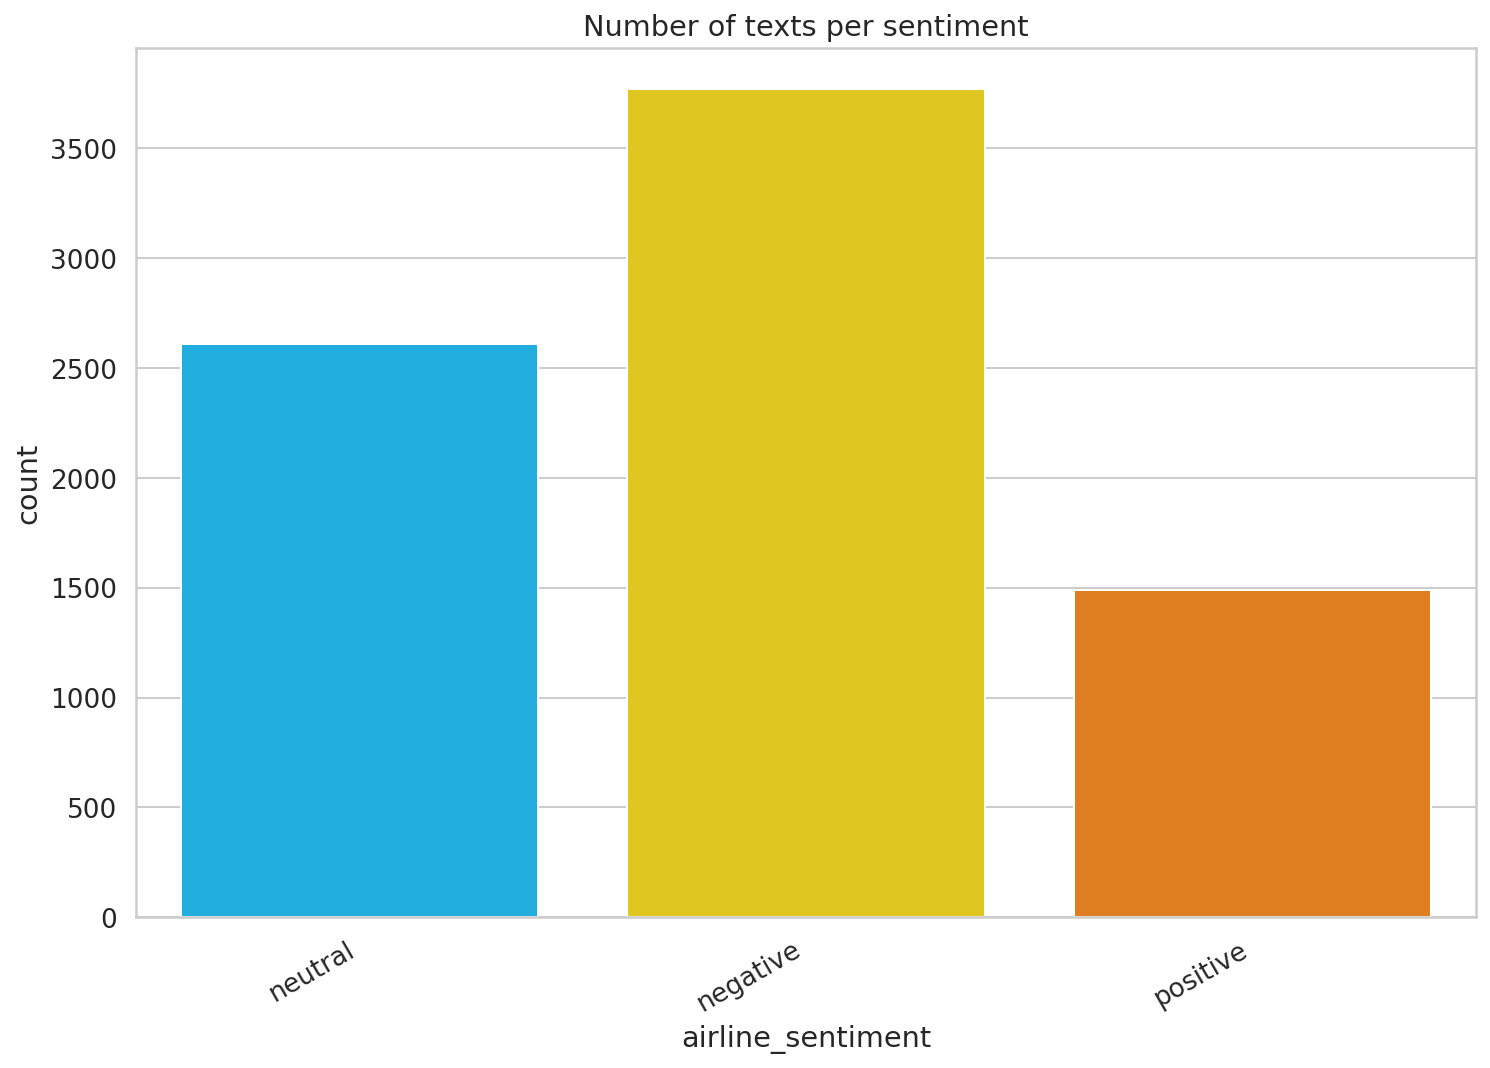

In [ ]:
chart = sns.countplot(df.airline_sentiment, palette=HAPPY_COLORS_PALETTE)
plt.title("Number of texts per sentiment")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');

In [ ]:

class_list = ['neutral','negative','positive']

df['pred_class'] = df.apply(lambda x:  class_list.index(x['airline_sentiment']),axis=1)


In [ ]:
df.head()

,airline_sentiment,text,pred_class
0,neutral,Trabajar en #Ryanair como #TMA: https://t.co/r...,0
1,neutral,@Iberia @FIONAFERRER Cuando gusten en Cancún s...,0
2,negative,Sabiais que @Iberia te trata muy bien en santi...,1
3,negative,NUNCA NUNCA NUNCA pidáis el café de Ryanair.\n...,1
4,positive,@cris_tortu @dakar @Iberia @Mitsubishi_ES @BFG...,2


In [ ]:
df.tail()

,airline_sentiment,text,pred_class
7862,negative,@Iberia @iberiaexpress especialistas en dejart...,1
7863,neutral,"Con @Iberia, mi destino a un solo click. ¡Dese...",0
7864,positive,@Iberia Muy bien. Muchas gracias,2
7865,negative,Es que volar con Ryanair es peor que irte a ch...,1
7866,negative,Iberia inaugura un nuevo espacio Premium para ...,1


In [ ]:
df.shape

(7867, 3)

In [ ]:
final_df = df[['text','pred_class']]

print(final_df.shape)
final_df.head()

(7867, 2)


,text,pred_class
0,Trabajar en #Ryanair como #TMA: https://t.co/r...,0
1,@Iberia @FIONAFERRER Cuando gusten en Cancún s...,0
2,Sabiais que @Iberia te trata muy bien en santi...,1
3,NUNCA NUNCA NUNCA pidáis el café de Ryanair.\n...,1
4,@cris_tortu @dakar @Iberia @Mitsubishi_ES @BFG...,2


In [ ]:
final_df.rename(columns={"text": "tweet"},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
final_df.head()

,tweet,pred_class
0,Trabajar en #Ryanair como #TMA: https://t.co/r...,0
1,@Iberia @FIONAFERRER Cuando gusten en Cancún s...,0
2,Sabiais que @Iberia te trata muy bien en santi...,1
3,NUNCA NUNCA NUNCA pidáis el café de Ryanair.\n...,1
4,@cris_tortu @dakar @Iberia @Mitsubishi_ES @BFG...,2


In [ ]:
final_df.tail()

,tweet,pred_class
7862,@Iberia @iberiaexpress especialistas en dejart...,1
7863,"Con @Iberia, mi destino a un solo click. ¡Dese...",0
7864,@Iberia Muy bien. Muchas gracias,2
7865,Es que volar con Ryanair es peor que irte a ch...,1
7866,Iberia inaugura un nuevo espacio Premium para ...,1


In [ ]:
final_df.shape

(7867, 2)

In [ ]:
final_df.describe(include='all')

,tweet,pred_class
count,7867,7867.000000
unique,7790,NaN
top,@Ryanair Madrid,NaN
freq,11,NaN
mean,NaN,0.857633
std,NaN,0.707605
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,1.000000


In [ ]:
def univariate_categorical(df,x):
       
    print('\nNumber of unique values => ' + str(len(df[x].unique())) + '\n\n')

    plt.figure(figsize=(10, 10))
    
    y = "count"
    plt.subplot(2, 1, 1)
    plt.xticks(rotation=90)

    sns.countplot(df[x])
    count_df = df[x].value_counts().rename(y).reset_index().rename(columns={"index":x})
    y = "percent(%)"
    percent_df = df[x].value_counts(normalize=True).rename(y).reset_index().rename(columns={"index":x})
    plt.subplot(2, 1, 2)
    sns.barplot(percent_df[x], percent_df[y], data=percent_df)
    plt.xticks(rotation=90)
    plt.show()
    print(tabulate(pd.merge(percent_df, count_df, how='inner'), headers='keys', tablefmt='fancy_grid'))


In [ ]:
class_list

['neutral', 'negative', 'positive']

negative : 1
neutral :0
positive : 2


Number of unique values => 3




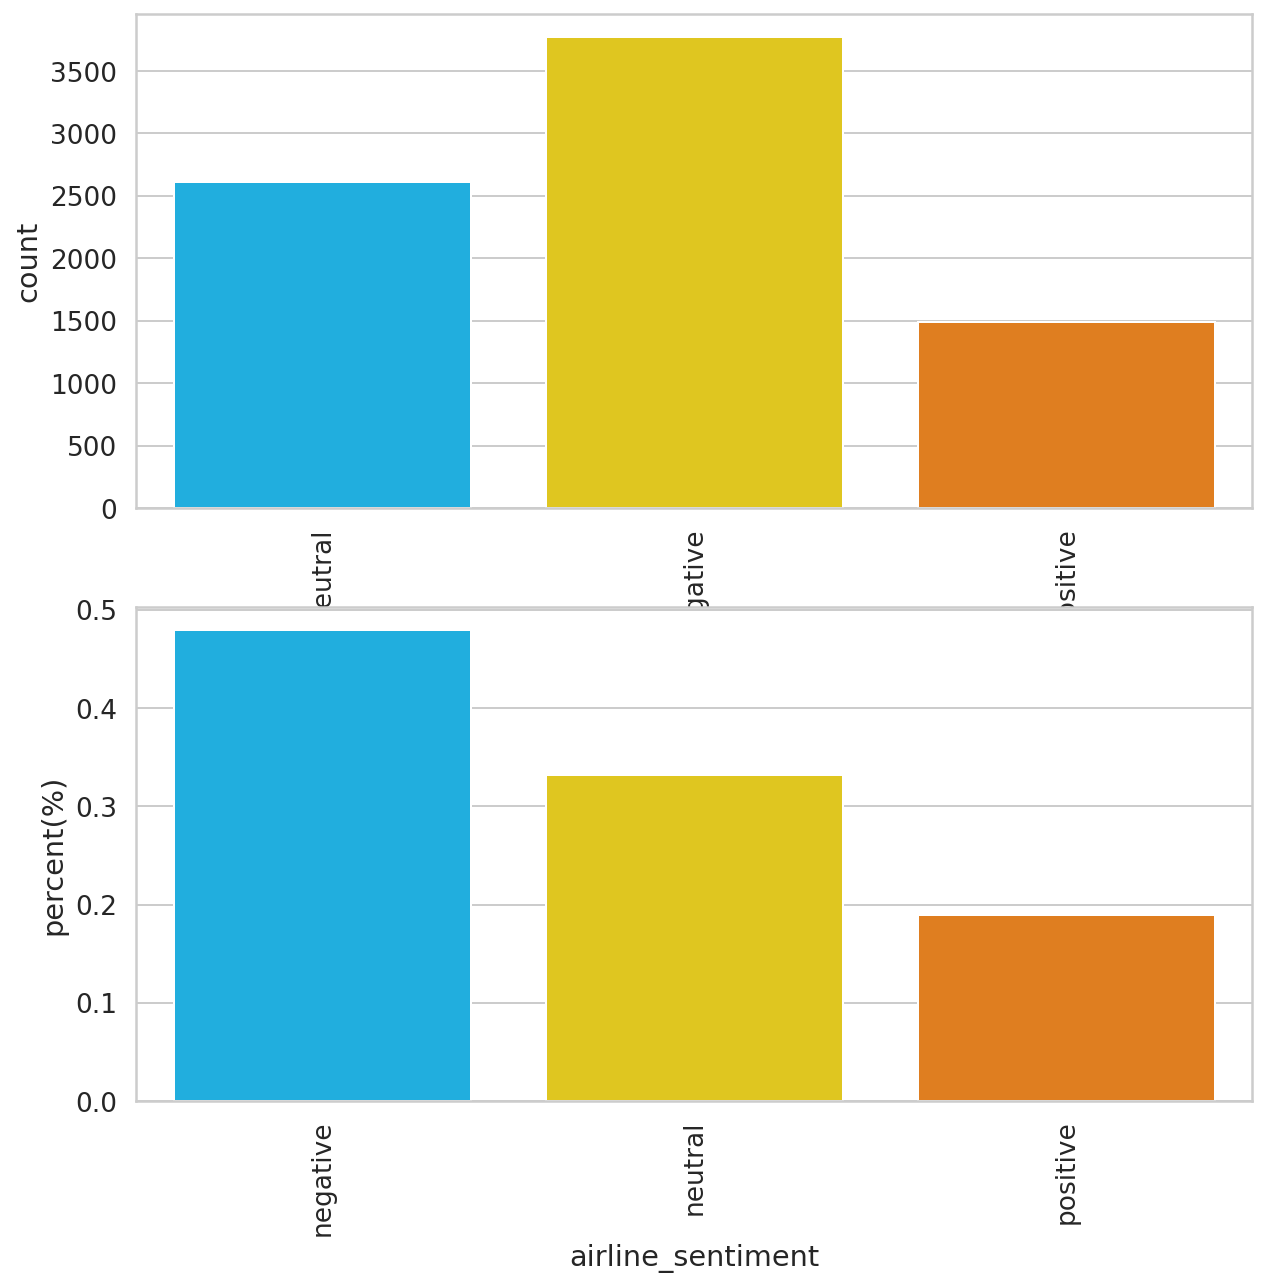

╒════╤═════════════════════╤══════════════╤═════════╕
│    │ airline_sentiment   │   percent(%) │   count │
╞════╪═════════════════════╪══════════════╪═════════╡
│  0 │ negative            │     0.47909  │    3769 │
├────┼─────────────────────┼──────────────┼─────────┤
│  1 │ neutral             │     0.331638 │    2609 │
├────┼─────────────────────┼──────────────┼─────────┤
│  2 │ positive            │     0.189272 │    1489 │
╘════╧═════════════════════╧══════════════╧═════════╛


In [ ]:
univariate_categorical(df,'airline_sentiment')


Number of unique values => 3




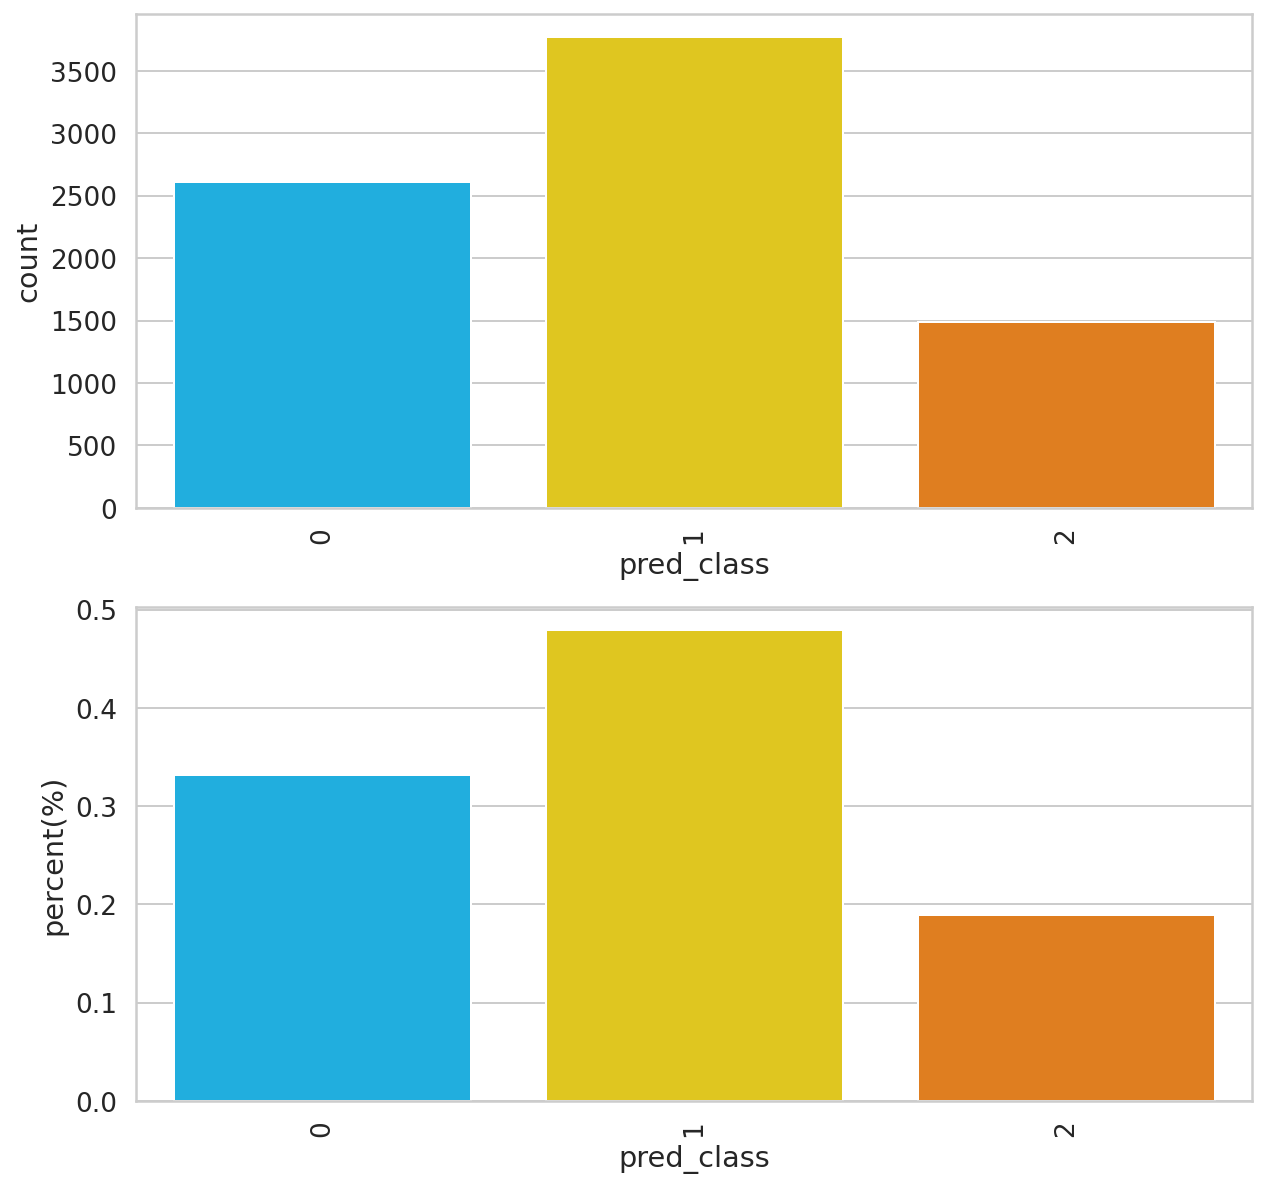

╒════╤══════════════╤══════════════╤═════════╕
│    │   pred_class │   percent(%) │   count │
╞════╪══════════════╪══════════════╪═════════╡
│  0 │            1 │     0.47909  │    3769 │
├────┼──────────────┼──────────────┼─────────┤
│  1 │            0 │     0.331638 │    2609 │
├────┼──────────────┼──────────────┼─────────┤
│  2 │            2 │     0.189272 │    1489 │
╘════╧══════════════╧══════════════╧═════════╛


In [ ]:
univariate_categorical(final_df,'pred_class')

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(final_df, test_size=0.10,random_state=42)

print('train shape: ',train_df.shape)
print('test shape: ',test_df.shape)

train shape:  (7080, 2)
test shape:  (787, 2)


In [ ]:
train_df.shape

(7080, 2)

In [ ]:
train_df.head()

,tweet,pred_class
642,@Iberia Hola. El vuelo IB7471 deja de prestar ...,0
4246,@TurismoCity @InfoViajera Por qué algunos apar...,0
176,Llamen a estos que la CGT esta en cualquiera. ...,1
4190,Muchas Gracias feliz de haber viajado con uste...,2
5818,Menos mal que yo volaré con Ryanair https://t....,2


In [ ]:
train_df.tail()

,tweet,pred_class
5226,Ryanair aplaza hasta 2018 el pago por embarcar...,0
5390,@el_pais Iberia se va a sacar la loteria vendi...,1
860,Nueva incorporación a la flota!! A340 de @Iber...,2
7603,@Iberia donde puedo agregar algo a un reclamo?...,0
7270,@Iberia gracias. he conseguido comprar por la ...,2


### Load Pretrained Spanish Model

In [ ]:
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es",
    num_labels=3,
    args=train_args
)

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


Some weights of the model checkpoint at mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es were not used when initializing BertForSequenceClassification: ['qa_outputs.weight', 'qa_outputs.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to b

### Train Model

In [ ]:
# Train the model
model.train_model(train_df)


/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:282: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = model.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)

result

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:754: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


{'acc': 0.6149936467598475,
 'eval_loss': 1.592808055531497,
 'f1': 0.6149936467598475,
 'mcc': 0.3755349500497596}

# save and load the model

save files without outputs/ 

In [ ]:
import os
import tarfile

def save_model(model_path='',file_name=''):
  files = [files for root, dirs, files in os.walk(model_path)][0]
  with tarfile.open(file_name+ '.tar.gz', 'w:gz') as f:
    for file in files:
      f.add(f'{model_path}/{file}')

In [ ]:
save_model('outputs','eseval-distilbert-spanish')

In [ ]:
!tar -zxvf ./eseval-distilbert-spanish.tar.gz

outputs/model_args.json
outputs/special_tokens_map.json
outputs/pytorch_model.bin
outputs/tokenizer_config.json
outputs/config.json
outputs/training_args.bin
outputs/eval_results.txt
outputs/vocab.txt


In [ ]:
!rm -rf outputs

In [ ]:
!cp -r "/content/eseval-distilbert-spanish.tar.gz" "/content/drive/My Drive/SpanishModel/"

### Test the loaded model on a real example

In [ ]:
sampleSubmission = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Spanish_Airline_Tweets/sampleSubmission.csv")

In [ ]:
sampleSubmission.head()

,tweet_id,airline_sentiment
0,9.350000e+17,negative
1,9.380000e+17,negative
2,9.360000e+17,negative
3,9.310000e+17,negative
4,9.240000e+17,neutral


In [ ]:
tweets_submission = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Spanish_Airline_Tweets/tweets_submission.csv")

In [ ]:
tweets_submission.head()

,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,True,0,0,@Iberia Está clara vuestra política de rascar ...,NaN,Sun Dec 17 06:01:21 +0000 2017,942273491440631808,NaN,NaN
1,False,0,0,Iberia Plus cumple 25 años. Queremos celebrarl...,NaN,Tue Dec 19 06:41:55 +0000 2017,943008475608682502,NaN,NaN
2,False,0,0,"A ver, @Iberia, de verdad. Lo vuestro con el ...",NaN,Thu Nov 16 18:26:02 +0000 2017,931226872729530368,NaN,Madrid
3,False,0,0,".@JavierJover, head of partnership and SMBs en...",NaN,Thu Nov 23 19:42:01 +0000 2017,933782711600283650,NaN,Madrid
4,False,0,0,"Faro, Portugal 🇵🇹🤓✈️ https://t.co/Obzj8YlXTL",NaN,Sat Dec 16 11:06:10 +0000 2017,941987812534038529,NaN,Hawaii


In [ ]:
tweets_submission.columns

Index(['is_reply', 'reply_count', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
tweets_submission['text'][0]

'@Iberia Está clara vuestra política de rascar por todos lados. Lo q os digo es q en vuelos de 1500€ de clientes fie… https://t.co/9S1YyDJs8I'

In [ ]:
import os
import tarfile

def unpack_model(model_name=''): 
  tar = tarfile.open(f"{model_name}.tar.gz", "r:gz")
  tar.extractall()
  tar.close()


In [ ]:

unpack_model("/content/drive/My Drive/SpanishModel/eseval-distilbert-spanish")

In [ ]:
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "outputs/",
    num_labels=3,
    args=train_args
)

negative : 1
neutral :0
positive : 2

In [ ]:
class_list = ['neutral','negative','positive']

test_tweet = tweets_submission['text'][0]

predictions, raw_outputs = model.predict([test_tweet])

print(predictions[0])
print(class_list[predictions[0]])


1
negative


In [ ]:
class_list = ['neutral','negative','positive']


test_tweet1 = tweets_submission['text'][1]
predictions, raw_outputs = model.predict([test_tweet1])
print(predictions[0])
print(class_list[predictions[0]])


2
positive


In [ ]:
class_list = ['neutral','negative','positive']

test_tweet = tweets_submission['text'][0]

test_tweet1 = tweets_submission['text'][1]
predictions, raw_outputs = model.predict([test_tweet,test_tweet1])

for i in range(len(predictions)):
    print(predictions[i],":",class_list[predictions[i]])


1 : negative
2 : positive


In [ ]:

"""
@Iberia Your policy of scratching everywhere is clear. What I tell you is that in flights of € 1500 from faithful customers… https://t.co/9S1YyDJs8I

"""

tweets_submission['text'][0] 


'@Iberia Está clara vuestra política de rascar por todos lados. Lo q os digo es q en vuelos de 1500€ de clientes fie… https://t.co/9S1YyDJs8I'

In [ ]:
"""
Iberia Plus turns 25. We want to celebrate it with you in a very special way. Choose your favorite number and ... ... https://t.co/aRf5cPNyL9
"""
tweets_submission['text'][1]  

'Iberia Plus cumple 25 años. Queremos celebrarlo contigo de una manera muy especial. Elige tu número favorito y... ¡… https://t.co/aRf5cPNyL9'

In [ ]:
sampleSubmission.columns

Index(['tweet_id', 'airline_sentiment'], dtype='object')

In [ ]:
sampleSubmission.head()

,tweet_id,airline_sentiment
0,9.350000e+17,negative
1,9.380000e+17,negative
2,9.360000e+17,negative
3,9.310000e+17,negative
4,9.240000e+17,neutral


In [ ]:
sampleSubmission.shape

(1964, 2)

In [ ]:
tweets_submission.shape

(1967, 9)

In [ ]:
tweets_submission.columns

Index(['is_reply', 'reply_count', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
df_submission = tweets_submission[[ 'text','tweet_id']]

In [ ]:
df_submission.head()

,text,tweet_id
0,@Iberia Está clara vuestra política de rascar ...,942273491440631808
1,Iberia Plus cumple 25 años. Queremos celebrarl...,943008475608682502
2,"A ver, @Iberia, de verdad. Lo vuestro con el ...",931226872729530368
3,".@JavierJover, head of partnership and SMBs en...",933782711600283650
4,"Faro, Portugal 🇵🇹🤓✈️ https://t.co/Obzj8YlXTL",941987812534038529


In [ ]:
df_submission['text'].to_list()

['@Iberia Está clara vuestra política de rascar por todos lados. Lo q os digo es q en vuelos de 1500€ de clientes fie… https://t.co/9S1YyDJs8I',
 'Iberia Plus cumple 25 años. Queremos celebrarlo contigo de una manera muy especial. Elige tu número favorito y... ¡… https://t.co/aRf5cPNyL9',
 'A ver,  @Iberia, de verdad. Lo vuestro con el espacio entre asientos es exagerado. Mido una mierda de 1.70m y no qu… https://t.co/1STiaPpPlP',
 '.@JavierJover, head of partnership and SMBs en Iberia, recibe a los partners de @PayPalSpain a la presentación del… https://t.co/H02fLILavT',
 'Faro, Portugal 🇵🇹🤓✈️ https://t.co/Obzj8YlXTL',
 '@AirHelp_ES @Iberia Sí, están dejando hoy en overbooking encima a un pasajero que compró su asiento el 23 de marzo.… https://t.co/Yb6HtHqJTK',
 '@Iberia Compañía de bandera de España. Cancelan un vuelo te envían a otro destino y 40 minutos esperando a un autobús. Eficiencia envidiable',
 '#iberia #iberiaexpress casi perdemos avión pq una empleada no nos encuentra en e

In [ ]:
output = []

In [ ]:
class_list = ['neutral','negative','positive']
predictions, raw_outputs = model.predict(df_submission['text'].to_list())

for i in range(len(predictions)):
    output.append(class_list[predictions[i]])
    print(predictions[i],":",class_list[predictions[i]])


1 : negative
2 : positive
1 : negative
0 : neutral
0 : neutral
1 : negative
1 : negative
1 : negative
1 : negative
0 : neutral
2 : positive
0 : neutral
1 : negative
0 : neutral
1 : negative
0 : neutral
0 : neutral
1 : negative
1 : negative
0 : neutral
0 : neutral
1 : negative
0 : neutral
1 : negative
0 : neutral
1 : negative
0 : neutral
2 : positive
1 : negative
1 : negative
1 : negative
0 : neutral
0 : neutral
0 : neutral
1 : negative
2 : positive
1 : negative
1 : negative
0 : neutral
1 : negative
2 : positive
0 : neutral
2 : positive
1 : negative
0 : neutral
1 : negative
1 : negative
0 : neutral
2 : positive
0 : neutral
1 : negative
1 : negative
2 : positive
1 : negative
1 : negative
1 : negative
2 : positive
0 : neutral
2 : positive
0 : neutral
1 : negative
0 : neutral
2 : positive
1 : negative
0 : neutral
1 : negative
2 : positive
1 : negative
1 : negative
1 : negative
2 : positive
1 : negative
0 : neutral
1 : negative
0 : neutral
1 : negative
2 : positive
1 : negative
1 : negativ

In [ ]:
output

['negative',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'negative',
 'negative',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'positive',
 'negative',
 'negative',

In [ ]:
sampleSubmission.head()

,tweet_id,airline_sentiment
0,9.350000e+17,negative
1,9.380000e+17,negative
2,9.360000e+17,negative
3,9.310000e+17,negative
4,9.240000e+17,neutral


In [ ]:
df_submission['airline_sentiment'] = output

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_submission.head()

,text,tweet_id,airline_sentiment
0,@Iberia Está clara vuestra política de rascar ...,942273491440631808,negative
1,Iberia Plus cumple 25 años. Queremos celebrarl...,943008475608682502,positive
2,"A ver, @Iberia, de verdad. Lo vuestro con el ...",931226872729530368,negative
3,".@JavierJover, head of partnership and SMBs en...",933782711600283650,neutral
4,"Faro, Portugal 🇵🇹🤓✈️ https://t.co/Obzj8YlXTL",941987812534038529,neutral


In [ ]:
df_submission_final = df_submission[['tweet_id','airline_sentiment']]

In [ ]:
df_submission_final.head()

,tweet_id,airline_sentiment
0,942273491440631808,negative
1,943008475608682502,positive
2,931226872729530368,negative
3,933782711600283650,neutral
4,941987812534038529,neutral


In [ ]:
df_submission_final.tail()

,tweet_id,airline_sentiment
1962,941058185946943489,negative
1963,935946913077170176,positive
1964,923475744914894848,positive
1965,948567886477524992,negative
1966,927658252069953538,positive


In [ ]:
df_submission_final.shape

(1967, 2)

In [ ]:
df_submission_final.to_csv("/content/drive/My Drive/Colab Notebooks/Spanish_Airline_Tweets/df_submission_final.csv",index=False)

In [ ]:
sampleSubmission.head()

,tweet_id,airline_sentiment
0,9.350000e+17,negative
1,9.380000e+17,negative
2,9.360000e+17,negative
3,9.310000e+17,negative
4,9.240000e+17,neutral
